In [1]:
import matplotlib.pyplot as plt
from L_sys.base import LSystem
from L_sys.builtin import (
    DragonCurve,
    FractalTree,
    FractalPlant,
    Sierpinski
)

In [2]:
def plot_state(
    l_sys: LSystem,
    num_iters: int,
    initial_state: str | None = None,
    heading: float = 90,
    length: float = 1,
    ax=None
):
    if ax is None:
        fig = plt.figure(figsize=(10, 5))
        ax = fig.add_subplot(111)

    xs, ys = l_sys.process_state(
        l_sys.grow(initial_state, num_iters),
        heading=heading, length=length
    )
    ax.plot(xs, ys)
    ax.set_aspect('equal')
    return ax

# Dragon Curve

To define a ruleset, inherit from the LSystem

100%|██████████| 8/8 [00:00<00:00, 5469.35it/s]


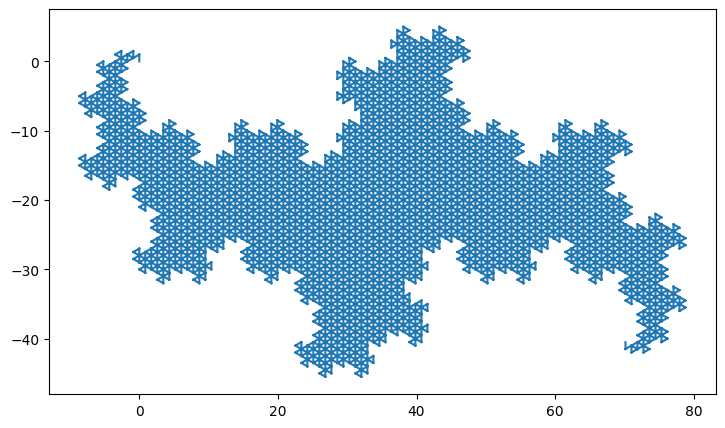

In [5]:
class DragonCurve2(LSystem):
    def __init__(self):
        rules = {
            'F': 'F+F-F'
        }
        turning_angle=120
        initial_state='F'
        super().__init__(rules, initial_state, turning_angle)
plot_state(DragonCurve2(), 8);

We can also use the built-in ruleset 

100%|██████████| 10/10 [00:00<00:00, 10087.31it/s]


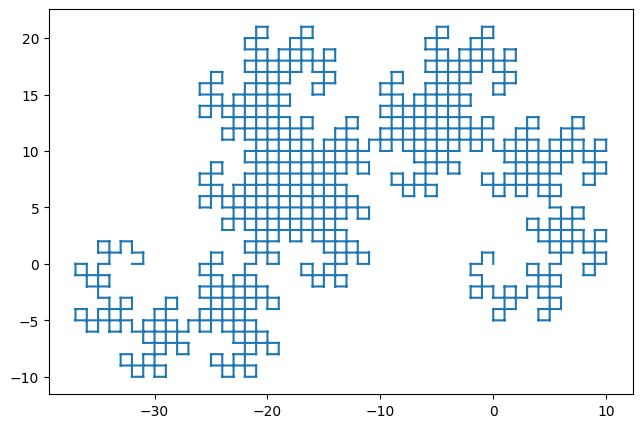

In [3]:
plot_state(DragonCurve(), 10);

# Sierpinski Triangle

In [6]:
class Sierpinski2(LSystem):
    def __init__(self):
        rules = {
            'F': 'F-G+F+G-F',
            'G': 'GG'
        }
        turning_angle=120
        initial_state='F-G-G'
        super().__init__(rules, initial_state, turning_angle)

100%|██████████| 6/6 [00:00<00:00, 11528.09it/s]


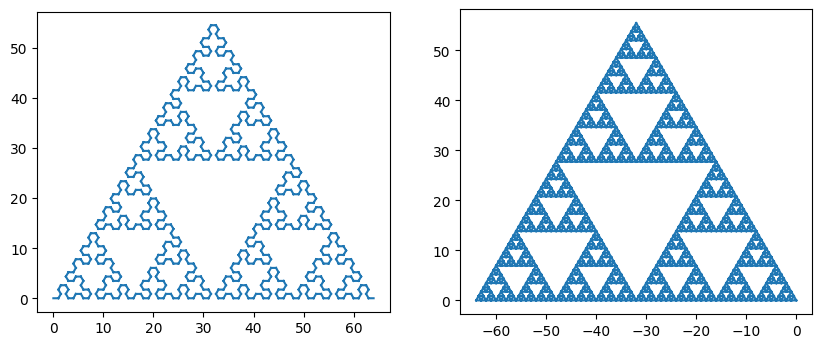

In [8]:
num_iters = 6

fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(1, 2)

plot_state(Sierpinski(), num_iters, heading=0, ax=axes[0])
plot_state(Sierpinski2(), num_iters, heading=180, ax=axes[1]);

# Fractal Tree and Fractal Plant

In fact, we don't even need to define the ruleset, we can also change some other configurations

100%|██████████| 6/6 [00:00<00:00, 3680.29it/s]


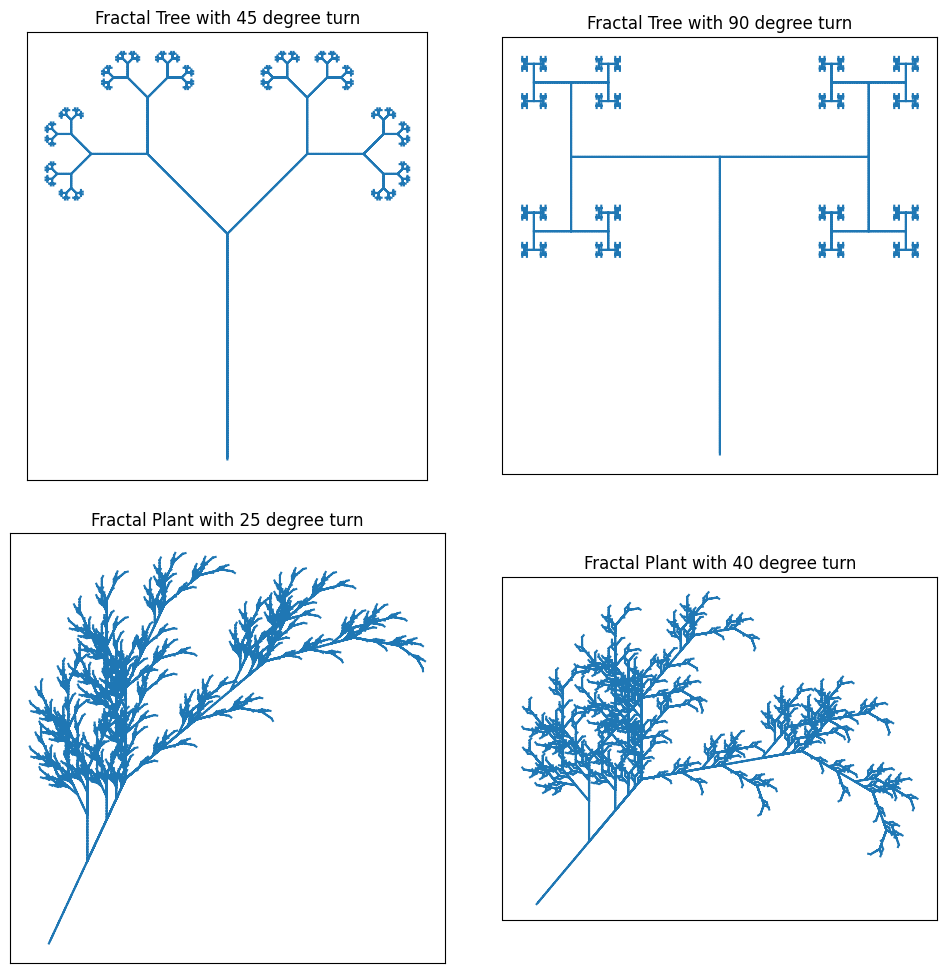

In [ ]:
num_iters = [8, 8, 6, 6]
rulesets = [FractalTree(), FractalTree(turning_angle=90), FractalPlant(), FractalPlant(turning_angle=40)]

fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(2, 2).flatten()

fig.tight_layout()
for i, ruleset in enumerate(rulesets):
    plot_state(ruleset, num_iters[i], ax=axes[i])

    axes[i].set_title(f'Fractal {'Tree' if i < 2 else 'Plant'}'
                      f' with {ruleset.turning_angle} degree turn')
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

# Using `shrink_factor`

There is also a shrink factor attribute that corresponds to the grammars:
- `*`: multiply the current length of line segment by `shrink_factor`
- `/`: mutliply the current length of line segment by `1/shrink_factor`

This can be applied to the Fractal Tree to create larger branches

In [3]:
class NicerFractalTree(LSystem):
    def __init__(self,
        initial_state = 'F',
        turning_angle = 45,
        shrink_factor = .7
    ):
        rules = {
            'F': 'G[*+F]-F',
            ']': ']/'
        }
        super().__init__(rules, initial_state, turning_angle, shrink_factor)

100%|██████████| 8/8 [00:00<00:00, 17439.93it/s]


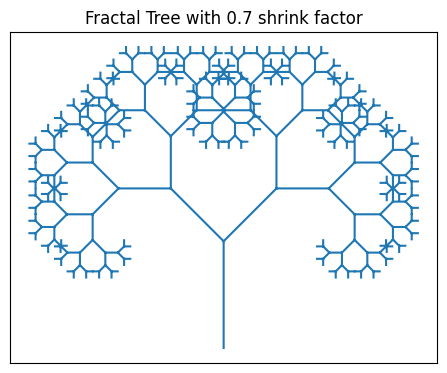

In [4]:
num_iters = 8
nft = NicerFractalTree()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

fig.tight_layout()
plot_state(nft, num_iters, ax=ax)

ax.set_title(f'Fractal Tree with {nft.shrink_factor} shrink factor')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]);

100%|██████████| 8/8 [00:00<00:00, 8492.64it/s]


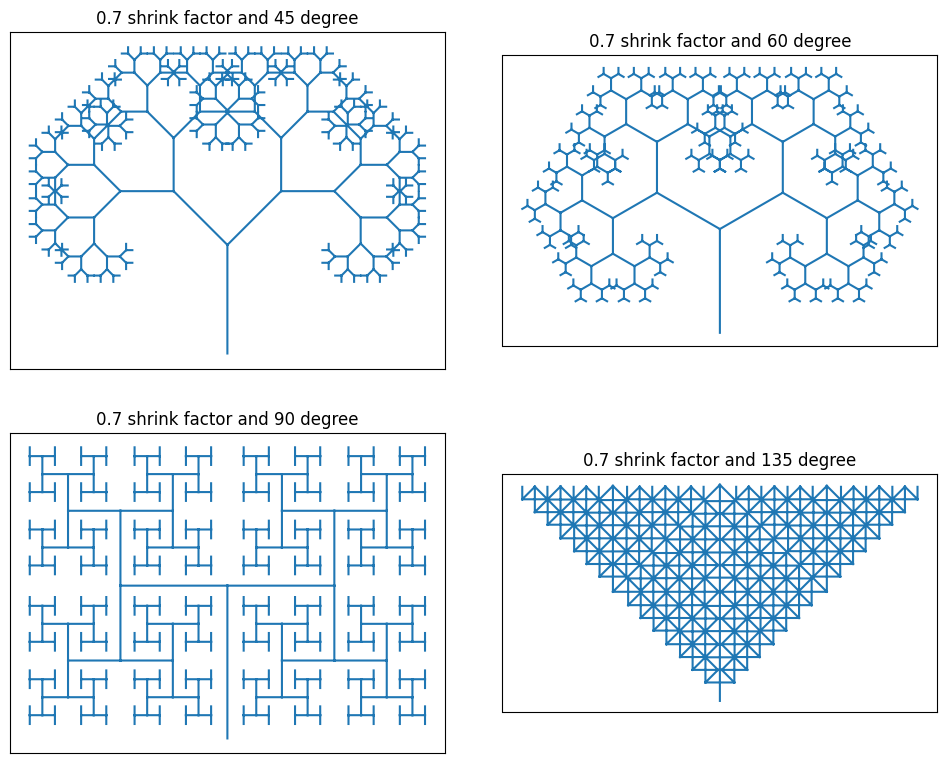

In [5]:
num_iters = 8
angles = [45, 60, 90, 135]
nft = NicerFractalTree()

fig = plt.figure(figsize=(10, 8))
axes = fig.subplots(2, 2).flatten()

fig.tight_layout()
for i, angle in enumerate(angles):
    nft.turning_angle = angle
    plot_state(nft, num_iters, ax=axes[i])

    axes[i].set_title(f'{nft.shrink_factor} shrink factor and {angle} degree')
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])